In [2]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS

Desenrojecer el espectro usando exceso de color estelar de Calzetti+2000
(obtenido con exceso de color gaseoso de Dominguez+2013)

Ahora, para poder ingresar por input el valor de $A_V$:

$R_V = \dfrac{A_V}{E(B-V)}$

$A_V = E(B-V) * R_V$

Donde R_v , de Calzetti+2000 , será 4.05 $\pm$ 0.80

el exceso de color estelar para slit 1 es: 0.068024004193637 \
el exceso de color estelar para slit 3 es: 0.012067117527483734 \
el exceso de color estelar para slit 7 es: 0.06474741413121757 \
el exceso de color estelar para slit 9 es: 0.0009511677261391637 \
el exceso de color estelar para slit 11 es: 0.08456376330498595 \
el exceso de color estelar para slit 17 es: 0.011202033961688708 \
el exceso de color estelar para slit 19 es: 0.01689033085792115 \
el exceso de color estelar para slit 21 es: 0.13612502253526057 

In [3]:
A_v1 = 0.068024004193637 * 4.05
A_v3 = 0.012067117527483734 * 4.05
A_v7 = 0.06474741413121757 * 4.05
A_v9 = 0.0009511677261391637 * 4.05
A_v11 = 0.08456376330498595 * 4.05
A_v17 = 0.011202033961688708 * 4.05
A_v19 = 0.01689033085792115 * 4.05
A_v21 = 0.13612502253526057 * 4.05

print(f'el valor de A_v para slit 1 es {A_v1}')
print(f'el valor de A_v para slit 3 es {A_v3}')
print(f'el valor de A_v para slit 7 es {A_v7}')
print(f'el valor de A_v para slit 11 es {A_v11}')
print(f'el valor de A_v para slit 17 es {A_v17}')
print(f'el valor de A_v para slit 19 es {A_v19}')
print(f'el valor de A_v para slit 21 es {A_v21}')

el valor de A_v para slit 1 es 0.2754972169842298
el valor de A_v para slit 3 es 0.04887182598630912
el valor de A_v para slit 7 es 0.26222702723143115
el valor de A_v para slit 11 es 0.3424832413851931
el valor de A_v para slit 17 es 0.04536823754483926
el valor de A_v para slit 19 es 0.06840583997458065
el valor de A_v para slit 21 es 0.5513063412678053


SLIT 1

In [3]:
#abrir mi fits
slit1_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99.fits'
sp1_f99 = fits.open(slit1_f99)

sp1_f99.info()
sp1_f99[0].header["OBJECT"]

Filename: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2234, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

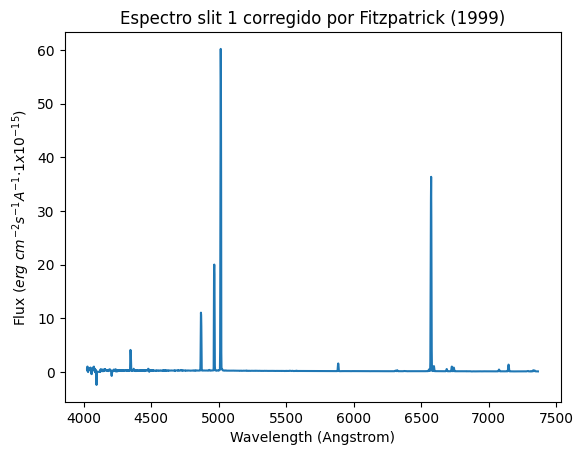

In [4]:
# extraer data (flux -ya corregido por f99-)
data1_f99=sp1_f99[0].data
header1_f99=sp1_f99[0].header
obj_name1_f99 = header1_f99.get("OBJECT", "Unknown")

flux1_f99=data1_f99[0]
w1_f99=WCS(header1_f99, naxis=1, relax=False, fix=False)
wave1_f99=w1_f99.wcs_pix2world(np.arange(len(flux1_f99)),0)[0]

plt.plot(wave1_f99, flux1_f99)
plt.title("Espectro slit 1 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [5]:
wave1_f99, flux1_f99

(array([4024.00463867, 4025.50053573, 4026.99643278, ..., 7361.35096765,
        7362.8468647 , 7364.34276175]),
 array([0.41495657, 0.18658112, 0.9814094 , ..., 0.08679579, 0.08841158,
        0.07890005], dtype='>f4'))

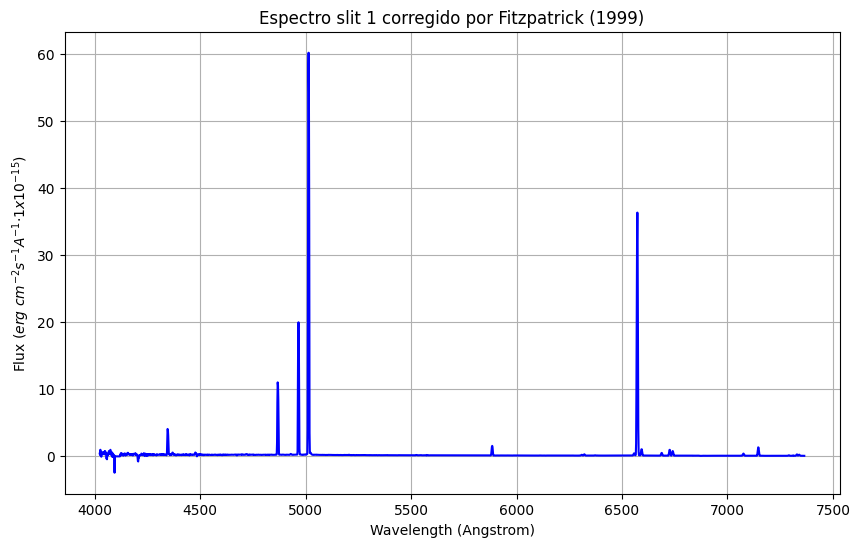

In [6]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave1_f99, flux1_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [7]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave1_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v1 
wave1_f99_c00 = extinction.calzetti00(wave1_f99, A_v1, 4.05)
print(f' extinción en magnitudes para slit 1 con calzetti00: {wave1_f99_c00}') #array of extinction in magnitudes at each input wavelength


 extinción en magnitudes para slit 1 con calzetti00: [0.37317619 0.37305446 0.37293278 ... 0.19514931 0.19509739 0.19504549]


In [8]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 1: {flux1_f99}')

# "deredden" flux by A_v1 with calzetti+2000
flux1_f99_c00 = remove(calzetti00(wave1_f99, A_v1, 4.05), flux1_f99)
print(f'valor de flujo deredden para slit 1 con calzetti00: {flux1_f99_c00}')

valor de flujo corregido por f99 para slit 1: [0.41495657 0.18658112 0.9814094  ... 0.08679579 0.08841158 0.07890005]
valor de flujo deredden para slit 1 con calzetti00: [0.58515797 0.263081   1.38364064 ... 0.10388633 0.10581522 0.09442684]


In [9]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 1: {flux1_f99}')

# "deredden" flux by A_v1 with calzetti+2000
fflux1_f99_c00 = remove(calzetti00(wave1_f99, 0.2754972169842298, 4.05), flux1_f99)
print(f'valor de flujo deredden para slit 1 con calzetti00: {fflux1_f99_c00}')

valor de flujo corregido por f99 para slit 1: [0.41495657 0.18658112 0.9814094  ... 0.08679579 0.08841158 0.07890005]
valor de flujo deredden para slit 1 con calzetti00: [0.58515797 0.263081   1.38364064 ... 0.10388633 0.10581522 0.09442684]


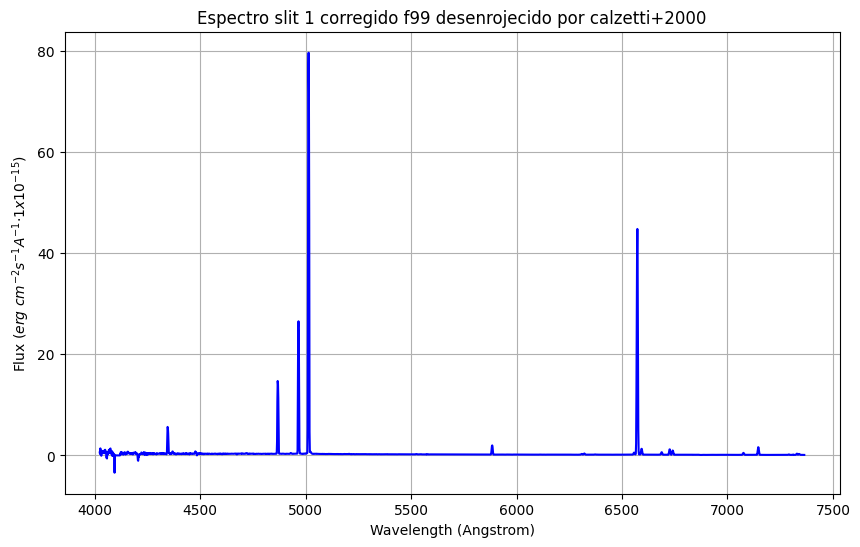

In [10]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave1_f99, flux1_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [11]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data1_f99[0] = flux1_f99_c00

# crear nuevo HDU 
slit1corrected = fits.PrimaryHDU(data=data1_f99, header=header1_f99)

# crear nuevo HDUList para guardar en un fits
sp1_corrected = fits.HDUList([slit1corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file1 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99_c00.fits'
sp1_corrected.writeto(new_fits_file1, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file1}")

Se ha guardado el archivo FITS corregido: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99_c00.fits


SLIT 3

In [12]:
#abrir mi fits
slit3_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit3_2D_f99.fits'
sp3_f99 = fits.open(slit3_f99)

sp3_f99.info()
sp3_f99[0].header["OBJECT"]

Filename: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit3_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2225, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

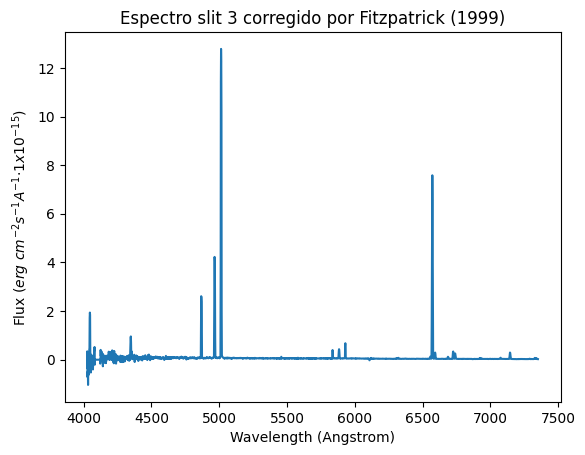

In [13]:
# extraer data (flux -ya corregido por f99-)
data3_f99=sp3_f99[0].data
header3_f99=sp3_f99[0].header
obj_name3_f99 = header3_f99.get("OBJECT", "Unknown")

flux3_f99=data3_f99[0]
w3_f99=WCS(header3_f99, naxis=1, relax=False, fix=False)
wave3_f99=w3_f99.wcs_pix2world(np.arange(len(flux3_f99)),0)[0]

plt.plot(wave3_f99, flux3_f99)
plt.title("Espectro slit 3 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [14]:
wave3_f99, flux3_f99

(array([4024.88818359, 4026.38395143, 4027.87971926, ..., 7348.48430586,
        7349.98007369, 7351.47584152]),
 array([-0.3119699 ,  0.3441402 , -0.70933807, ...,  0.02884455,
         0.02744501,  0.02553338], dtype='>f4'))

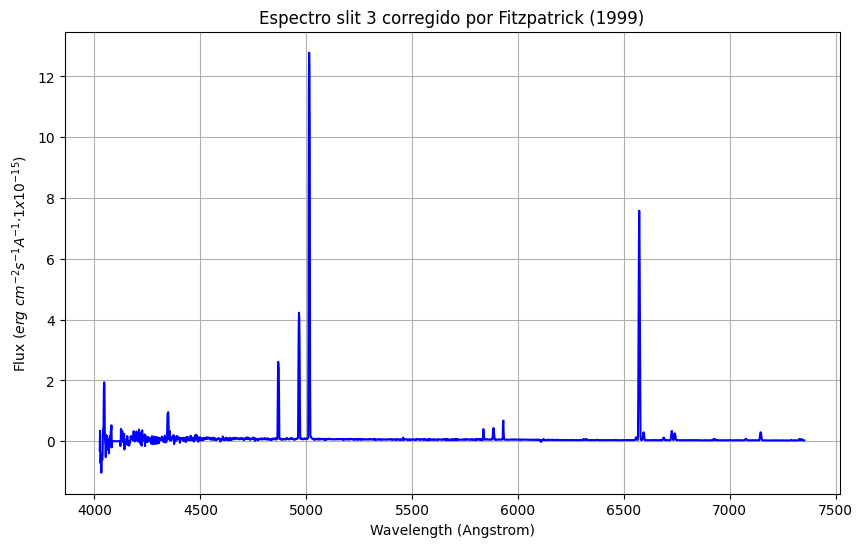

In [15]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3_f99, flux3_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [16]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave3_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v3 
wave3_f99_c00 = extinction.calzetti00(wave3_f99, A_v3, 4.05)
print(f' extinción en magnitudes para slit 3 con calzetti00: {wave3_f99_c00}') #array of extinction in magnitudes at each input wavelength


 extinción en magnitudes para slit 3 con calzetti00: [0.06618683 0.06616524 0.06614366 ... 0.03469788 0.03468864 0.0346794 ]


In [17]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 3: {flux3_f99}')

# "deredden" flux by A_v3 with calzetti+2000
flux3_f99_c00 = remove(calzetti00(wave3_f99, A_v3, 4.05), flux3_f99)
print(f'valor de flujo deredden para slit 3 con calzetti00: {flux3_f99_c00}')

valor de flujo corregido por f99 para slit 3: [-0.3119699   0.3441402  -0.70933807 ...  0.02884455  0.02744501
  0.02553338]
valor de flujo deredden para slit 3 con calzetti00: [-0.33157932  0.36576446 -0.75389478 ...  0.02978125  0.02833602
  0.0263621 ]


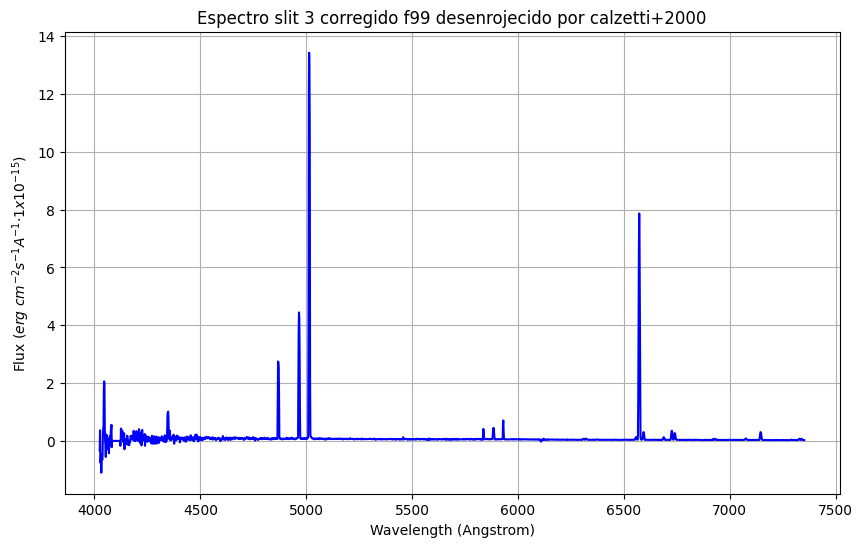

In [18]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3_f99, flux3_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [19]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data3_f99[0] = flux3_f99_c00

# crear nuevo HDU 
slit3corrected = fits.PrimaryHDU(data=data3_f99, header=header3_f99)

# crear nuevo HDUList para guardar en un fits
sp3_corrected = fits.HDUList([slit3corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file3 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit3_2D_f99_c00.fits'
sp3_corrected.writeto(new_fits_file3, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file3}")

Se ha guardado el archivo FITS corregido: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit3_2D_f99_c00.fits


SLIT 7

In [20]:
#abrir mi fits
slit7_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit7_2D_f99.fits'
sp7_f99 = fits.open(slit7_f99)

sp7_f99.info()
sp7_f99[0].header["OBJECT"]

Filename: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit7_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2178, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

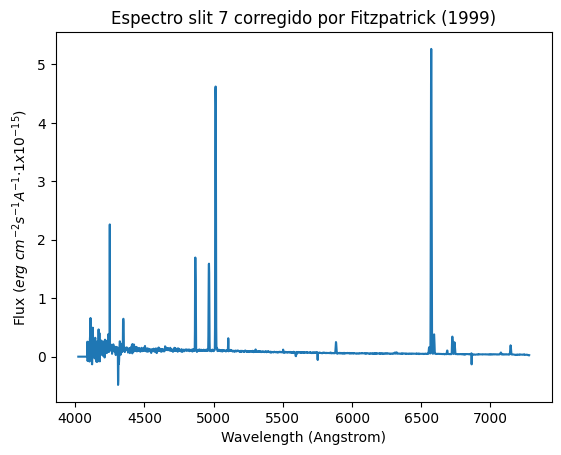

In [21]:
# extraer data (flux -ya corregido por f99-)
data7_f99=sp7_f99[0].data
header7_f99=sp7_f99[0].header
obj_name7_f99 = header7_f99.get("OBJECT", "Unknown")

flux7_f99=data7_f99[0]
w7_f99=WCS(header7_f99, naxis=1, relax=False, fix=False)
wave7_f99=w7_f99.wcs_pix2world(np.arange(len(flux7_f99)),0)[0]

plt.plot(wave7_f99, flux7_f99)
plt.title("Espectro slit 7 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [22]:
wave7_f99, flux7_f99

(array([4021.73339844, 4023.2299906 , 4024.72658277, ..., 7276.82135522,
        7278.31794739, 7279.81453955]),
 array([0.        , 0.        , 0.        , ..., 0.02906528, 0.02808513,
        0.02601549], dtype='>f4'))

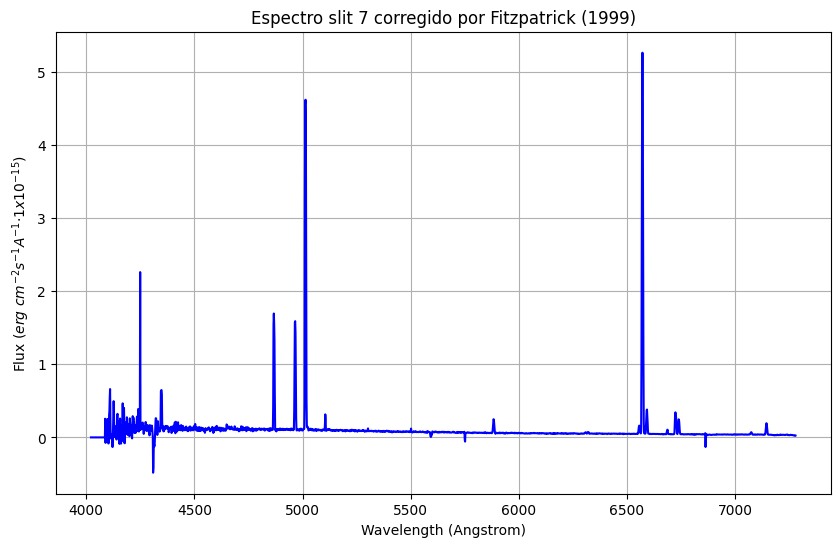

In [23]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave7_f99, flux7_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 7 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [24]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave7_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v7 
wave7_f99_c00 = extinction.calzetti00(wave7_f99, A_v7, 4.05)
print(f' extinción en magnitudes para slit 7 con calzetti00: {wave7_f99_c00}') #array of extinction in magnitudes at each input wavelength


 extinción en magnitudes para slit 7 con calzetti00: [0.35537702 0.35526101 0.35514506 ... 0.18857475 0.18852416 0.18847358]


In [25]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 7: {flux7_f99}')

# "deredden" flux by A_v3 with calzetti+2000
flux7_f99_c00 = remove(calzetti00(wave7_f99, A_v7, 4.05), flux7_f99)
print(f'valor de flujo deredden para slit 7 con calzetti00: {flux7_f99_c00}')

valor de flujo corregido por f99 para slit 7: [0.         0.         0.         ... 0.02906528 0.02808513 0.02601549]
valor de flujo deredden para slit 7 con calzetti00: [0.         0.         0.         ... 0.03457836 0.03341074 0.0309472 ]


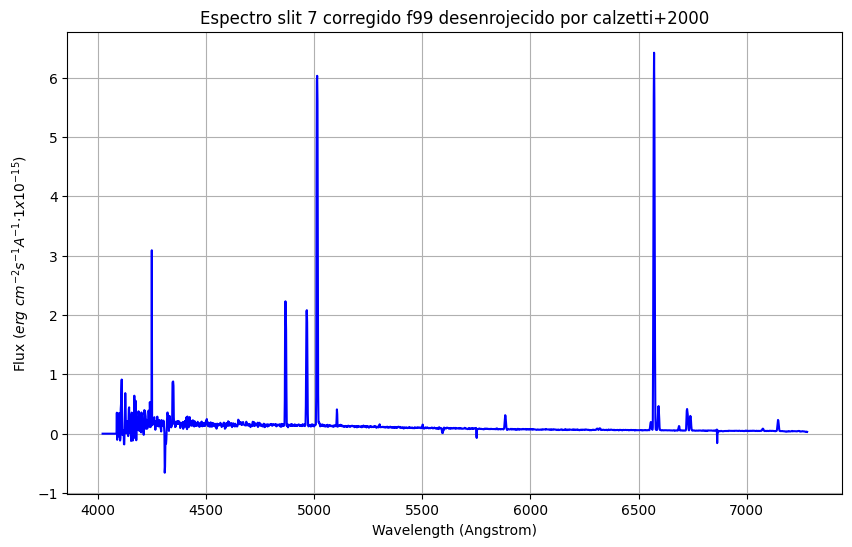

In [26]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave7_f99, flux7_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 7 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [27]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data7_f99[0] = flux7_f99_c00

# crear nuevo HDU 
slit7corrected = fits.PrimaryHDU(data=data7_f99, header=header7_f99)

# crear nuevo HDUList para guardar en un fits
sp7_corrected = fits.HDUList([slit7corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file7 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit7_2D_f99_c00.fits'
sp7_corrected.writeto(new_fits_file7, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file7}")

Se ha guardado el archivo FITS corregido: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit7_2D_f99_c00.fits


SLIT 9

In [4]:
#abrir mi fits
slit9_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit9_2D_f99.fits'
sp9_f99 = fits.open(slit9_f99)

sp9_f99.info()
sp9_f99[0].header["OBJECT"]

Filename: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit9_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2807, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

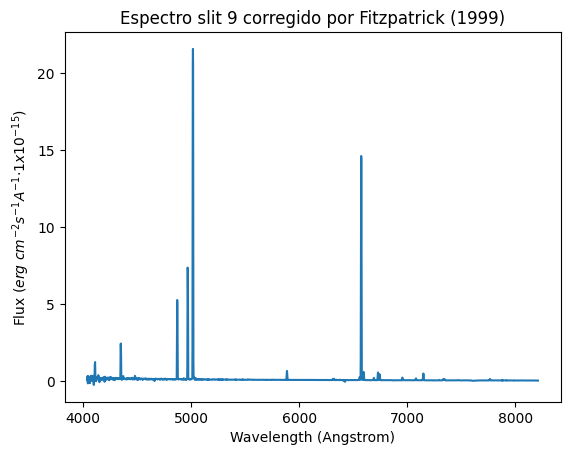

In [5]:
# extraer data (flux -ya corregido por f99-)
data9_f99=sp9_f99[0].data
header9_f99=sp9_f99[0].header
obj_name9_f99 = header9_f99.get("OBJECT", "Unknown")

flux9_f99=data9_f99[0]
w9_f99=WCS(header9_f99, naxis=1, relax=False, fix=False)
wave9_f99=w9_f99.wcs_pix2world(np.arange(len(flux9_f99)),0)[0]

plt.plot(wave9_f99, flux9_f99)
plt.title("Espectro slit 9 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [6]:
wave9_f99, flux9_f99

(array([4035.11450195, 4036.60158134, 4038.08866072, ..., 8204.88508892,
        8206.3721683 , 8207.85924768]),
 array([0.08760006, 0.12971926, 0.06943776, ..., 0.02084772, 0.02098486,
        0.02265898], dtype='>f4'))

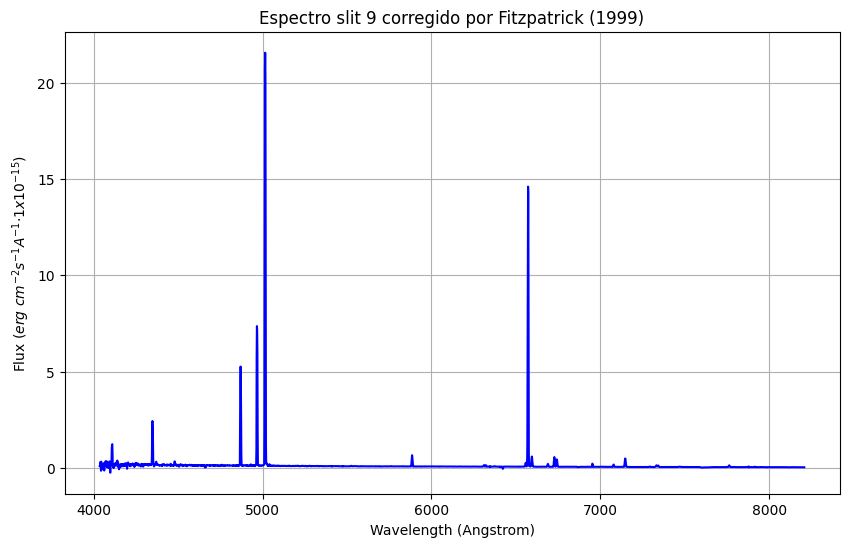

In [7]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave9_f99, flux9_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 9 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [8]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave9_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v9 
wave9_f99_c00 = extinction.calzetti00(wave9_f99, A_v9, 4.05)
print(f' extinción en magnitudes para slit 9 con calzetti00: {wave9_f99_c00}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 9 con calzetti00: [0.00520543 0.00520375 0.00520206 ... 0.00236139 0.00236081 0.00236023]


In [9]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 9: {flux9_f99}')

# "deredden" flux by A_v3 with calzetti+2000
flux9_f99_c00 = remove(calzetti00(wave9_f99, A_v9, 4.05), flux9_f99)
print(f'valor de flujo deredden para slit 9 con calzetti00: {flux9_f99_c00}')

valor de flujo corregido por f99 para slit 9: [0.08760006 0.12971926 0.06943776 ... 0.02084772 0.02098486 0.02265898]
valor de flujo deredden para slit 9 con calzetti00: [0.08802106 0.13034247 0.06977125 ... 0.02089311 0.02103054 0.02270829]


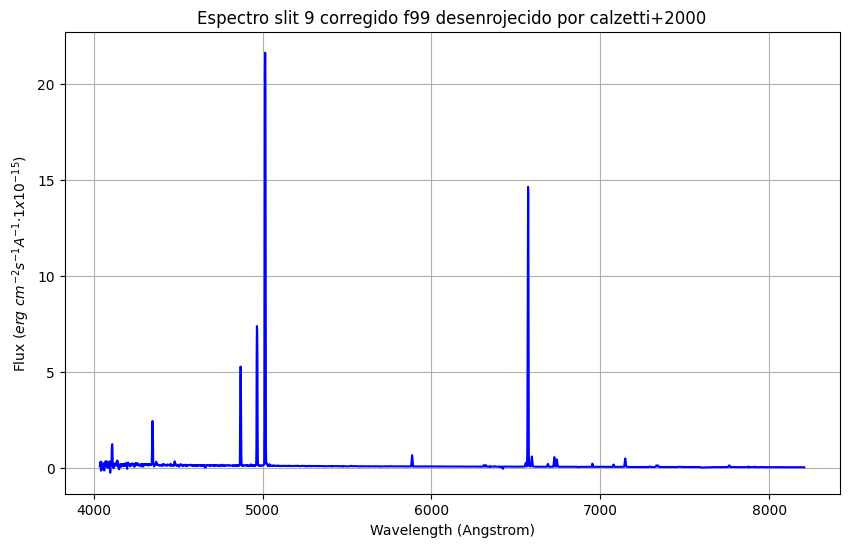

In [10]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave9_f99, flux9_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 9 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [11]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data9_f99[0] = flux9_f99_c00

# crear nuevo HDU 
slit9corrected = fits.PrimaryHDU(data=data9_f99, header=header9_f99)

# crear nuevo HDUList para guardar en un fits
sp9_corrected = fits.HDUList([slit9corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file9 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit9_2D_f99_c00.fits'
sp9_corrected.writeto(new_fits_file9, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file9}")

Se ha guardado el archivo FITS corregido: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit9_2D_f99_c00.fits


SLIT 11

In [28]:
#abrir mi fits
slit11_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit11_2D_f99.fits'
sp11_f99 = fits.open(slit11_f99)

sp11_f99.info()
sp11_f99[0].header["OBJECT"]

Filename: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit11_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2789, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

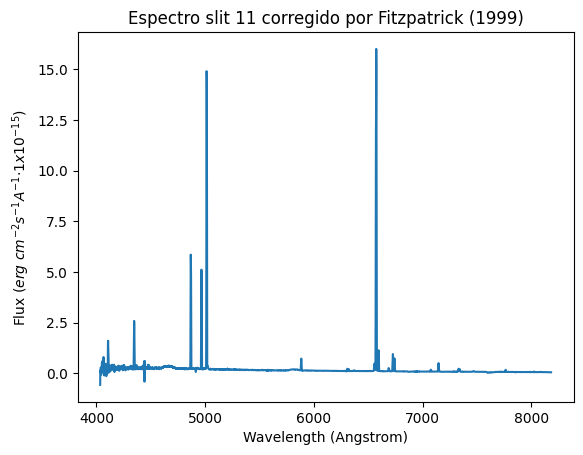

In [29]:
# extraer data (flux -ya corregido por f99-)
data11_f99=sp11_f99[0].data
header11_f99=sp11_f99[0].header
obj_name11_f99 = header11_f99.get("OBJECT", "Unknown")

flux11_f99=data11_f99[0]
w11_f99=WCS(header11_f99, naxis=1, relax=False, fix=False)
wave11_f99=w11_f99.wcs_pix2world(np.arange(len(flux11_f99)),0)[0]

plt.plot(wave11_f99, flux11_f99)
plt.title("Espectro slit 11 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [30]:
wave11_f99, flux11_f99

(array([4035.4362793 , 4036.92377269, 4038.41126609, ..., 8179.59288001,
        8181.08037341, 8182.5678668 ]),
 array([-0.57933223,  0.14156193,  0.13221006, ...,  0.04661347,
         0.04525968,  0.045425  ], dtype='>f4'))

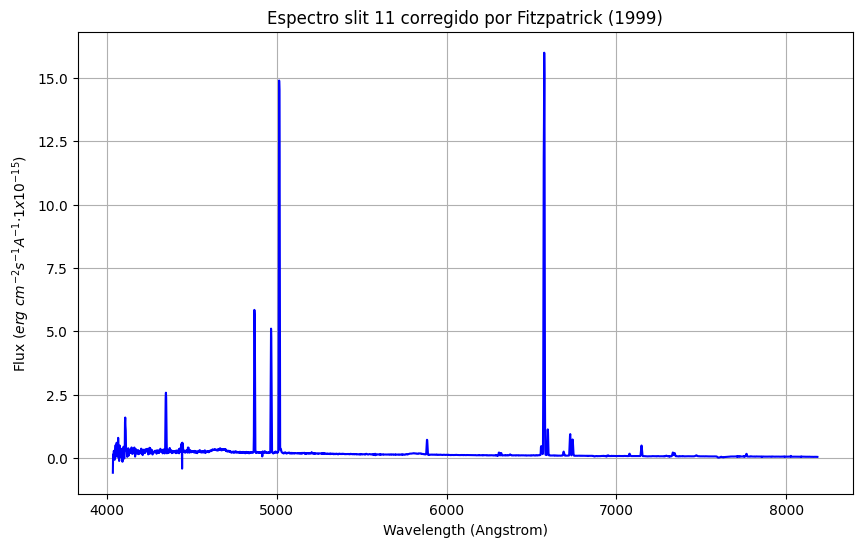

In [31]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave11_f99, flux11_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 11 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [32]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave7_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v11 
wave11_f99_c00 = extinction.calzetti00(wave11_f99, A_v11, 4.05)
print(f' extinción en magnitudes para slit 11 con calzetti00: {wave11_f99_c00}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 11 con calzetti00: [0.46275768 0.46260771 0.46245781 ... 0.21082093 0.21076894 0.21071698]


In [33]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 11: {flux11_f99}')

# "deredden" flux by A_v3 with calzetti+2000
flux11_f99_c00 = remove(calzetti00(wave11_f99, A_v11, 4.05), flux11_f99)
print(f'valor de flujo deredden para slit 11 con calzetti00: {flux11_f99_c00}')

valor de flujo corregido por f99 para slit 11: [-0.57933223  0.14156193  0.13221006 ...  0.04661347  0.04525968
  0.045425  ]
valor de flujo deredden para slit 11 con calzetti00: [-0.88721886  0.21676519  0.2024173  ...  0.05660305  0.0549565
  0.0551546 ]


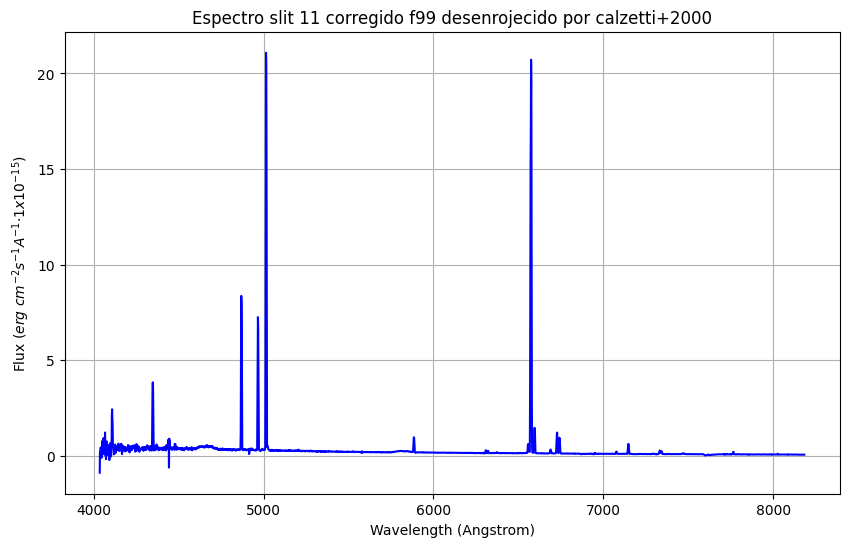

In [34]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave11_f99, flux11_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 11 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [35]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data11_f99[0] = flux11_f99_c00

# crear nuevo HDU 
slit11corrected = fits.PrimaryHDU(data=data11_f99, header=header11_f99)

# crear nuevo HDUList para guardar en un fits
sp11_corrected = fits.HDUList([slit11corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file11 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit11_2D_f99_c00.fits'
sp11_corrected.writeto(new_fits_file11, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file11}")

Se ha guardado el archivo FITS corregido: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit11_2D_f99_c00.fits


SLIT 17

In [36]:
#abrir mi fits
slit17_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit17_2D_f99.fits'
sp17_f99 = fits.open(slit17_f99)

sp17_f99.info()
sp17_f99[0].header["OBJECT"]

Filename: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit17_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2325, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

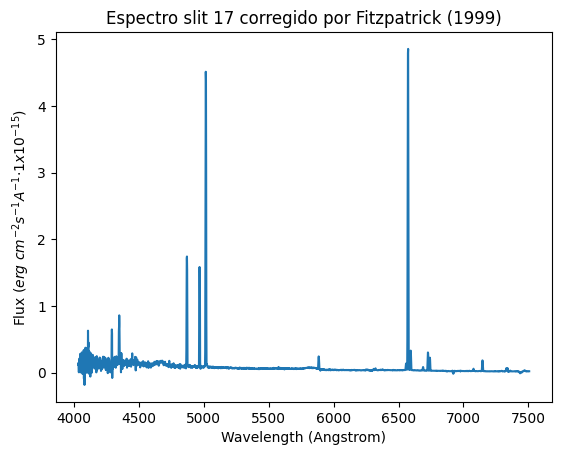

In [37]:
# extraer data (flux -ya corregido por f99-)
data17_f99=sp17_f99[0].data
header17_f99=sp17_f99[0].header
obj_name17_f99 = header17_f99.get("OBJECT", "Unknown")

flux17_f99=data17_f99[0]
w17_f99=WCS(header17_f99, naxis=1, relax=False, fix=False)
wave17_f99=w17_f99.wcs_pix2world(np.arange(len(flux17_f99)),0)[0]

plt.plot(wave17_f99, flux17_f99)
plt.title("Espectro slit 17 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [38]:
wave17_f99, flux17_f99

(array([4031.86035156, 4033.35543633, 4034.85052109, ..., 7503.44717026,
        7504.94225502, 7506.43733978]),
 array([0.11697919, 0.14834112, 0.02011708, ..., 0.02237691, 0.02235959,
        0.02252376], dtype='>f4'))

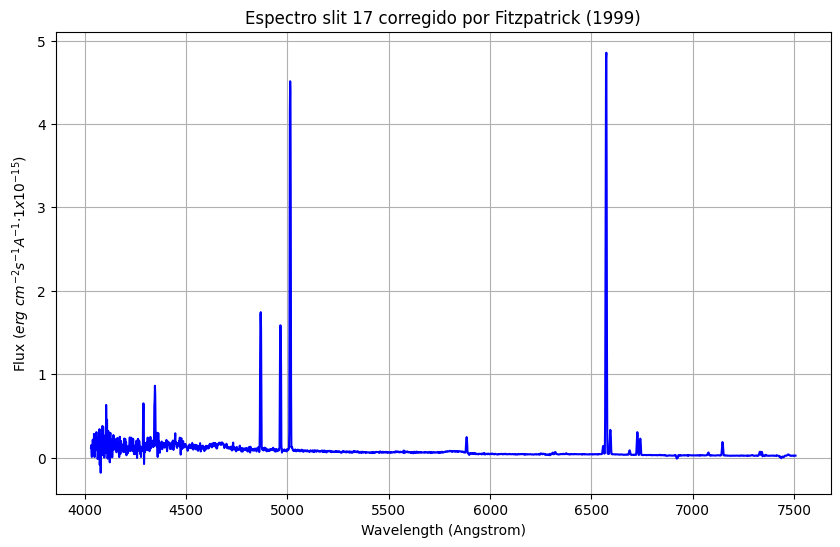

In [39]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave17_f99, flux17_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 17 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [40]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave17_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v17 
wave17_f99_c00 = extinction.calzetti00(wave17_f99, A_v17, 4.05)
print(f' extinción en magnitudes para slit 17 con calzetti00: {wave17_f99_c00}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 17 con calzetti00: [0.06134861 0.06132862 0.06130864 ... 0.03133982 0.03133159 0.03132337]


In [41]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 17: {flux17_f99}')

# "deredden" flux by A_v3 with calzetti+2000
flux17_f99_c00 = remove(calzetti00(wave17_f99, A_v17, 4.05), flux17_f99)
print(f'valor de flujo deredden para slit 17 con calzetti00: {flux17_f99_c00}')

valor de flujo corregido por f99 para slit 17: [0.11697919 0.14834112 0.02011708 ... 0.02237691 0.02235959 0.02252376]
valor de flujo deredden para slit 17 con calzetti00: [0.12377931 0.15696145 0.02128573 ... 0.02303223 0.02301423 0.02318303]


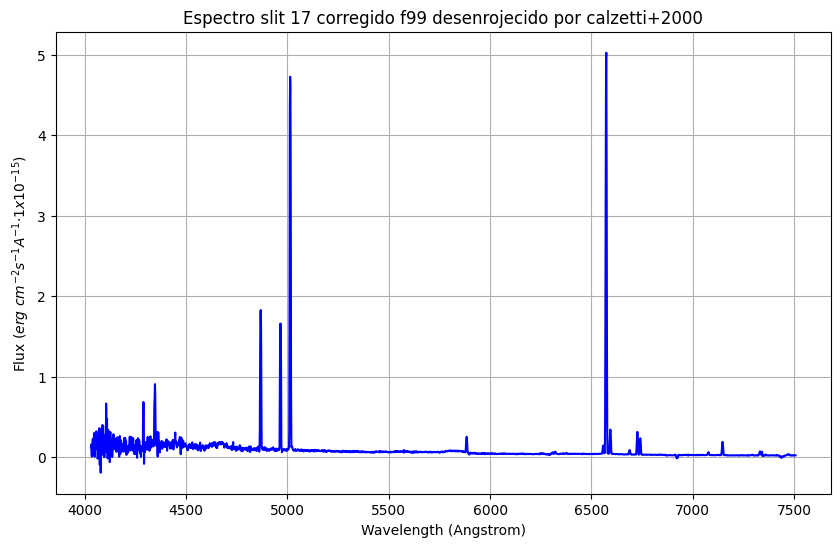

In [42]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave17_f99, flux17_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 17 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [43]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data17_f99[0] = flux17_f99_c00

# crear nuevo HDU 
slit17corrected = fits.PrimaryHDU(data=data17_f99, header=header17_f99)

# crear nuevo HDUList para guardar en un fits
sp17_corrected = fits.HDUList([slit17corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file17 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit17_2D_f99_c00.fits'
sp17_corrected.writeto(new_fits_file17, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file17}")

Se ha guardado el archivo FITS corregido: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit17_2D_f99_c00.fits


SLIT 19

In [44]:
#abrir mi fits
slit19_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit19_2D_f99.fits'
sp19_f99 = fits.open(slit19_f99)

sp19_f99.info()
sp19_f99[0].header["OBJECT"]

Filename: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit19_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2680, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

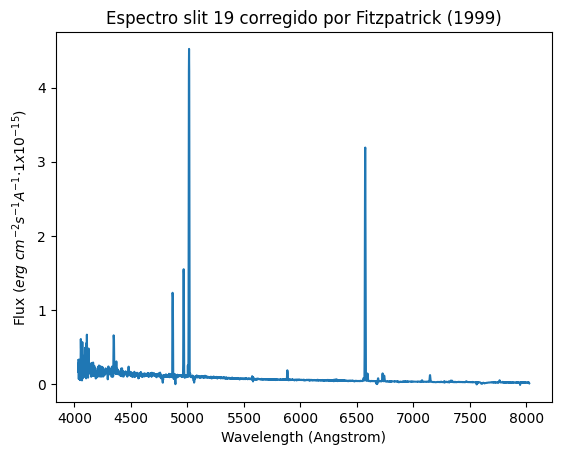

In [45]:
# extraer data (flux -ya corregido por f99-)
data19_f99=sp19_f99[0].data
header19_f99=sp19_f99[0].header
obj_name19_f99 = header19_f99.get("OBJECT", "Unknown")

flux19_f99=data19_f99[0]
w19_f99=WCS(header19_f99, naxis=1, relax=False, fix=False)
wave19_f99=w19_f99.wcs_pix2world(np.arange(len(flux19_f99)),0)[0]

plt.plot(wave19_f99, flux19_f99)
plt.title("Espectro slit 19 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [46]:
wave19_f99, flux19_f99

(array([4033.97583008, 4035.46533406, 4036.95483804, ..., 8021.37798369,
        8022.86748767, 8024.35699165]),
 array([0.3255917 , 0.16148691, 0.28447226, ..., 0.02540712, 0.01297107,
        0.01129139], dtype='>f4'))

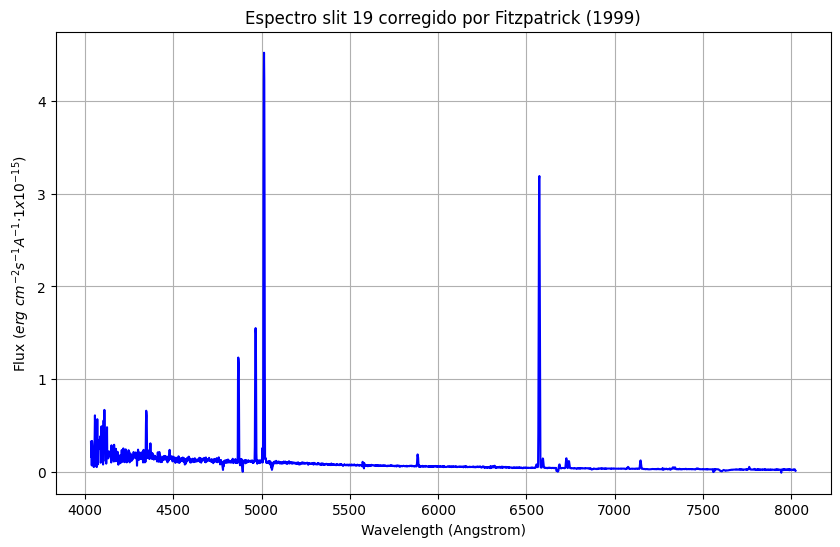

In [47]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave19_f99, flux19_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 19 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [48]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave19_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v19 
wave19_f99_c00 = extinction.calzetti00(wave19_f99, A_v19, 4.05)
print(f' extinción en magnitudes para slit 19 con calzetti00: {wave19_f99_c00}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 19 con calzetti00: [0.09245826 0.09242825 0.09239826 ... 0.04323459 0.04322378 0.04321298]


In [49]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 19: {flux19_f99}')

# "deredden" flux by A_v3 with calzetti+2000
flux19_f99_c00 = remove(calzetti00(wave19_f99, A_v19, 4.05), flux19_f99)
print(f'valor de flujo deredden para slit 19 con calzetti00: {flux19_f99_c00}')

valor de flujo corregido por f99 para slit 19: [0.3255917  0.16148691 0.28447226 ... 0.02540712 0.01297107 0.01129139]
valor de flujo deredden para slit 19 con calzetti00: [0.35453298 0.17583633 0.30974137 ... 0.02643926 0.01349788 0.01174985]


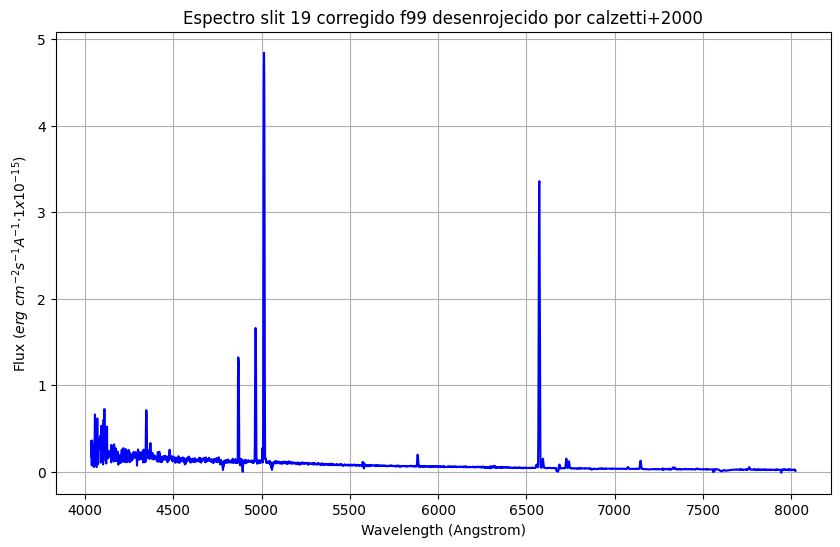

In [50]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave19_f99, flux19_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 19 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [51]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data19_f99[0] = flux19_f99_c00

# crear nuevo HDU 
slit19corrected = fits.PrimaryHDU(data=data19_f99, header=header19_f99)

# crear nuevo HDUList para guardar en un fits
sp19_corrected = fits.HDUList([slit19corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file19 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit19_2D_f99_c00.fits'
sp19_corrected.writeto(new_fits_file19, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file19}")

Se ha guardado el archivo FITS corregido: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit19_2D_f99_c00.fits


SLIT 21

In [52]:
#abrir mi fits
slit21_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit21_2D_f99.fits'
sp21_f99 = fits.open(slit21_f99)

sp21_f99.info()
sp21_f99[0].header["OBJECT"]

Filename: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit21_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2799, 1)   float32   


'NGC1313-MSK01 2D CON LACOS'

Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

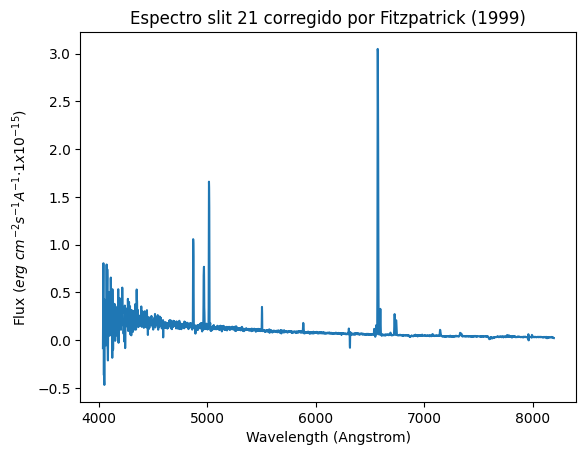

In [53]:
# extraer data (flux -ya corregido por f99-)
data21_f99=sp21_f99[0].data
header21_f99=sp21_f99[0].header
obj_name21_f99 = header21_f99.get("OBJECT", "Unknown")

flux21_f99=data21_f99[0]
w21_f99=WCS(header21_f99, naxis=1, relax=False, fix=False)
wave21_f99=w21_f99.wcs_pix2world(np.arange(len(flux21_f99)),0)[0]

plt.plot(wave21_f99, flux21_f99)
plt.title("Espectro slit 21 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [54]:
wave21_f99, flux21_f99

(array([4035.53613281, 4037.02295506, 4038.50977731, ..., 8192.69113684,
        8194.17795908, 8195.66478133]),
 array([-0.08408194,  0.23450576,  0.4192159 , ...,  0.02368925,
         0.02040092,  0.02031324], dtype='>f4'))

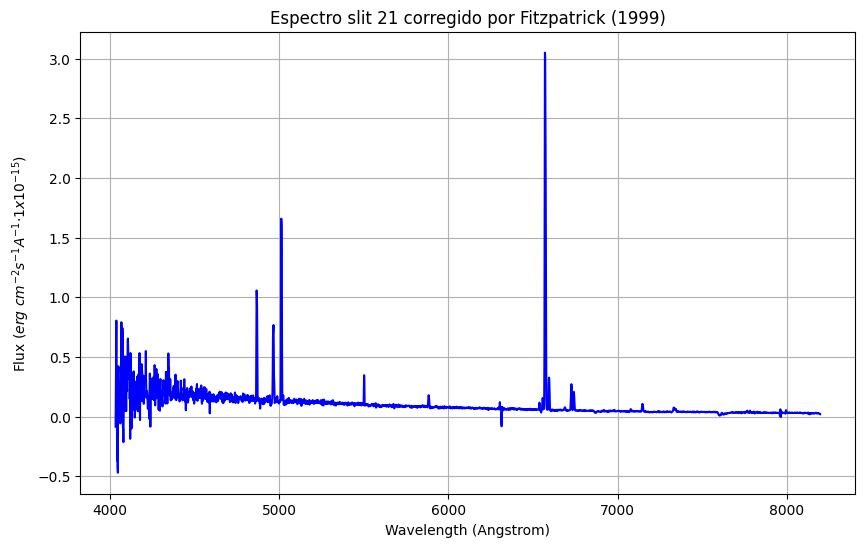

In [55]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21_f99, flux21_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [56]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave21_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v21 
wave21_f99_c00 = extinction.calzetti00(wave21_f99, A_v21, 4.05)
print(f' extinción en magnitudes para slit 21 con calzetti00: {wave21_f99_c00}') #array of extinction in magnitudes at each input wavelength

 extinción en magnitudes para slit 21 con calzetti00: [0.74489979 0.74465849 0.7444173  ... 0.33862948 0.33854611 0.33846277]


In [57]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 21: {flux21_f99}')

# "deredden" flux by A_v3 with calzetti+2000
flux21_f99_c00 = remove(calzetti00(wave21_f99, A_v21, 4.05), flux21_f99)
print(f'valor de flujo deredden para slit 21 con calzetti00: {flux21_f99_c00}')

valor de flujo corregido por f99 para slit 21: [-0.08408194  0.23450576  0.4192159  ...  0.02368925  0.02040092
  0.02031324]
valor de flujo deredden para slit 21 con calzetti00: [-0.1669793   0.46560422  0.83215582 ...  0.0323596   0.02786558
  0.02774369]


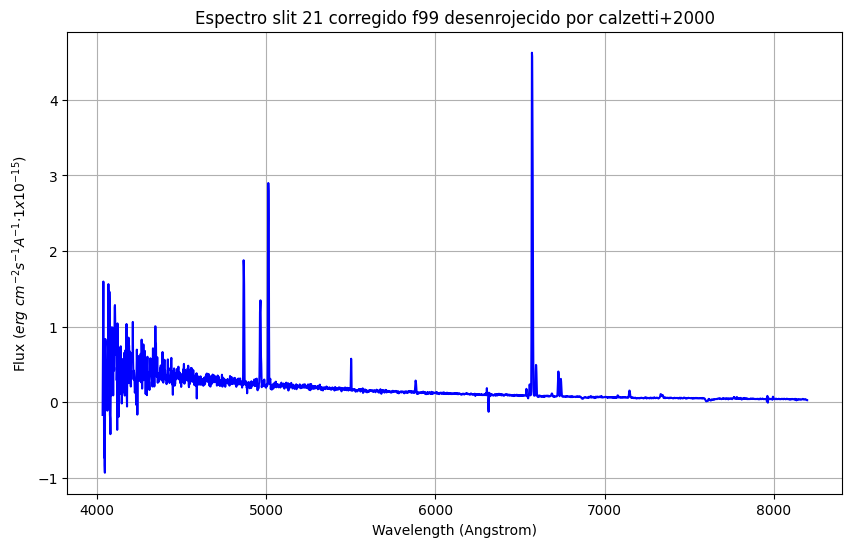

In [58]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21_f99, flux21_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [59]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data21_f99[0] = flux21_f99_c00

# crear nuevo HDU 
slit21corrected = fits.PrimaryHDU(data=data21_f99, header=header21_f99)

# crear nuevo HDUList para guardar en un fits
sp21_corrected = fits.HDUList([slit21corrected])

# guardar datos corregidos en un nuevo archivo FITS
new_fits_file21 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit21_2D_f99_c00.fits'
sp21_corrected.writeto(new_fits_file21, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file21}")

Se ha guardado el archivo FITS corregido: ../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit21_2D_f99_c00.fits
